# STA 141B Final Project:
By: Ryan Fouzdar and 

Introduction: 
For our final project, we want to look into the real estate market of Davis, CA and try to find trends in the data that could be useful to potential homebuyers or real estate agents. The real estate market is a constantly changing sector that can be affected by economic conditions. demographic trends, investment trends, and infrastructure projects. Since there is wide variety of factors, it could be useful to look into each of these trends and figure out how each of these could change the future of the Davis real estate market. 

To help focus our search, we focus on those key 4 traits for our project. We chose to assess economic indicators because it will be useful to see how certain indicators such as unemployment rates, job growth, and GDP trends can impact the buying or selling of houses. We can also see if our predictions for the data holds true that there is correlations between these trends and one impacts the other.

We also chose to focus on demographic trends as people from certain demographics may be more inclined to buy a house in Davis. This could be useful to real estate agents as they can target their advertisements to people of a similar demographic so they can maximize their selling capabilites.


You can finish the rest of the introduction with your questions
We also chose to focus on 






Thus, we boil our report down to 4 main qeustions to focus on which are:

Questions of Interest: 

1) How do local economic indicators, such as unemployment rates and labor force statistics, impact the performance of the property market?

2) Are there any demographic shifts occurring in the Yolo County area that might affect property values in the near future?

3) If I were to invest in such a property, what do we expect it to cost in the next X years?

4) Is the market experiencing growth, stability, or decline?
And are there any upcoming developments or infrastructure projects that could affect property values?

With our project, we dive deep into each of these questions and report data in nice tables and charts that readers can view and understand. 


# Background Information:

To make sure, we have an adequate amount of data, we broaden our demographics and economic indicators to the whole county of Yolo. Our region has seen considerable shifts in economic shifts and a change in demographics in recent years. All of these factors impact the real estate market in ways that is not easily visible. With the influx of young college students from Davis and families moving here for cheaper real estate, the landscape of the real estate market is currently changing. We can see evaluate if there is a need for more housing and this could lead for more analysis that can help with the market.


Finish with ur part



# Methods used:

For Question 1: We used beautiful soup to webscrape the code and then put the code into a pandas dataframe for easily analysis. We then used mat.plot.lib to graph the dataframe in an easy way so we can analysize the code better.

For Question 2: We used beautiful soup to webscrape the code and then put the code into a pandas dataframe for easy analysis. We webscraped 7 different tables so we create 7 different data frames. We only created 4 charts using mat.plot.lib as that was the most essential data for the demographics and then drew conclusions from the code.

finish with ur part



# Question 1) How do local economic indicators, such as unemployment rates and labor force statistics, impact the performance of the property market?

Hypothesis: We believe we are going to see that unemployment rate to be relatively constant barring recessions for a couple years. The labor force will increase as more individuals move to Yolo county and more businesses start up in Yolo county. This will show correlation to a rise in prices of houses as more people move to Yolo county the demand for houses will increase thus allowing sellers to raise their prices to meet that influx of a demand with limited supply.

Links used:
https://labormarketinfo.edd.ca.gov/cgi/databrowsing/localAreaProfileQSResults.asp?selectedarea=Yolo+County&selectedindex=57&menuChoice=localAreaPro&state=true&geogArea=0604000113&countyName=&submit1=View+Local+Area+Profile"

https://labormarketinfo.edd.ca.gov/cgi/databrowsing/localAreaProfileQSMoreResult.asp?viewAll=yes&viewAllUS=&currentPage=&currentPageUS=&sortUp=&sortDown=&criteria=property+values&categoryType=economicindicators&geogArea=0604000113&timeseries=property+valuesTimeSeries&more=&menuChoice=localAreaPro&printerFriendly=&BackHistory=-3&goTOPageText=

In [95]:
#Webscrapping for Question 1
import requests
from bs4 import BeautifulSoup
import pandas as pd

#Url
url = "https://labormarketinfo.edd.ca.gov/cgi/databrowsing/localAreaProfileQSMoreResult.asp?viewAll=yes&viewAllUS=&currentPage=&currentPageUS=&sortUp=&sortDown=&criteria=unemployment+rate&categoryType=employment&geogArea=0604000113&timeseries=unemployment+rateTimeSeries&more=&menuChoice=localAreaPro&printerFriendly=&BackHistory=-1&goTOPageText="
response = requests.get(url)

if response.status_code == 200:
    # Extract the HTML
    html_content = response.content
    # Parsing
    soup = BeautifulSoup(html_content, "html.parser")
    # Finding the table
    spans = soup.find_all("span", class_="tabledata")

    # Create table column names
    data = {
        "Unemployment Rate %": [],
        "Year": [],
        "Adjusted": [],
        "Prelim": [],
        "Period": [],
        "Labor Force": [],
        "No. of Employed": [],
        "No. of Unemployed": []
    }
    skip_unemployment_rate = True
    # Organize into dictionary
    for i, span in enumerate(spans):
        category = i % 8
        if category == 0:
            if skip_unemployment_rate:
                skip_unemployment_rate = False
                continue
            else:
                data["Unemployment Rate %"].append(span.text)
        elif category == 1:
            data["Year"].append(span.text)
        elif category == 2:
            data["Adjusted"].append(span.text)
        elif category == 3:
            data["Prelim"].append(span.text)
        elif category == 4:
            data["Period"].append(span.text)
        elif category == 5:
            data["Labor Force"].append(span.text)
        elif category == 6:
            data["No. of Employed"].append(span.text)
        elif category == 7:
            data["No. of Unemployed"].append(span.text)
    min_length = min(map(len, data.values()))
    data = {key: value[:min_length] for key, value in data.items()}
    

    # Create a DataFrame
    economic_statistics_chart = pd.DataFrame(data)
    economic_statistics_chart = pd.DataFrame(data, columns=["Year", "Adjusted", "Prelim", "Period", "Labor Force", "No. of Employed", "No. of Unemployed", "Unemployment Rate %"])

#Part 2: Webscrapping for property value statistics

# URL 
url = "https://labormarketinfo.edd.ca.gov/cgi/databrowsing/localAreaProfileQSMoreResult.asp?viewAll=yes&viewAllUS=&currentPage=&currentPageUS=&sortUp=&sortDown=&criteria=property+values&categoryType=economicindicators&geogArea=0604000113&timeseries=property+valuesTimeSeries&more=&menuChoice=localAreaPro&printerFriendly=&BackHistory=-3&goTOPageText="
response = requests.get(url)
if response.status_code == 200:
    html_content = response.content
    # Parsing
    soup = BeautifulSoup(html_content, "html.parser")
    spans = soup.find_all("span", class_="tabledata")

    # Dictionary for columns
    data = {
        "Property Value": [],
        "Year": [],
        "Period": [],
        "Tax Type Description": []
    }
    skip_property_value = True

    # Organize into dictionary
    for i, span in enumerate(spans):
        category = i % 4
        if category == 0:
            if skip_property_value:
                skip_property_value = False
                continue
            else:
                data["Property Value"].append(span.text)
        elif category == 1:
            data["Year"].append(span.text)
        elif category == 2:
            data["Period"].append(span.text)
        elif category == 3:
            data["Tax Type Description"].append(span.text)
    min_length = min(map(len, data.values()))
    data = {key: value[:min_length] for key, value in data.items()}
    
    # Create a pandas DataFrame
    median_house_price_chart = pd.DataFrame(data, columns=["Year", "Period", "Tax Type Description", "Property Value"])
    
print(median_house_price_chart)
print(economic_statistics_chart)




    Year  Period        Tax Type Description Property Value
0   2022  Annual  Median Price of Homes Sold       $634,000
1   2021  Annual  Median Price of Homes Sold       $586,495
2   2020  Annual  Median Price of Homes Sold       $490,000
3   2019  Annual  Median Price of Homes Sold       $451,750
4   2018  Annual  Median Price of Homes Sold       $439,729
5   2017  Annual  Median Price of Homes Sold       $419,954
6   2016  Annual  Median Price of Homes Sold       $389,303
7   2015  Annual  Median Price of Homes Sold       $373,441
8   2014  Annual  Median Price of Homes Sold       $344,423
9   2013  Annual  Median Price of Homes Sold       $297,016
10  2012  Annual  Median Price of Homes Sold       $235,912
11  2011  Annual  Median Price of Homes Sold       $227,710
12  2010  Annual  Median Price of Homes Sold       $248,553
13  2009  Annual  Median Price of Homes Sold       $247,466
     Year Adjusted      Prelim  Period Labor Force No. of Employed  \
0    2024  Not Adj      Prelim

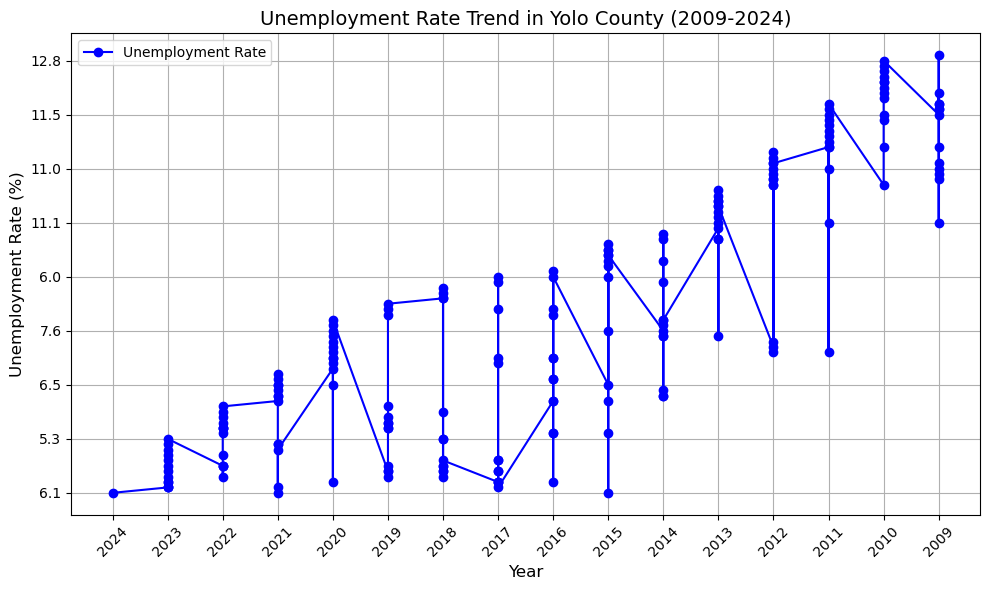

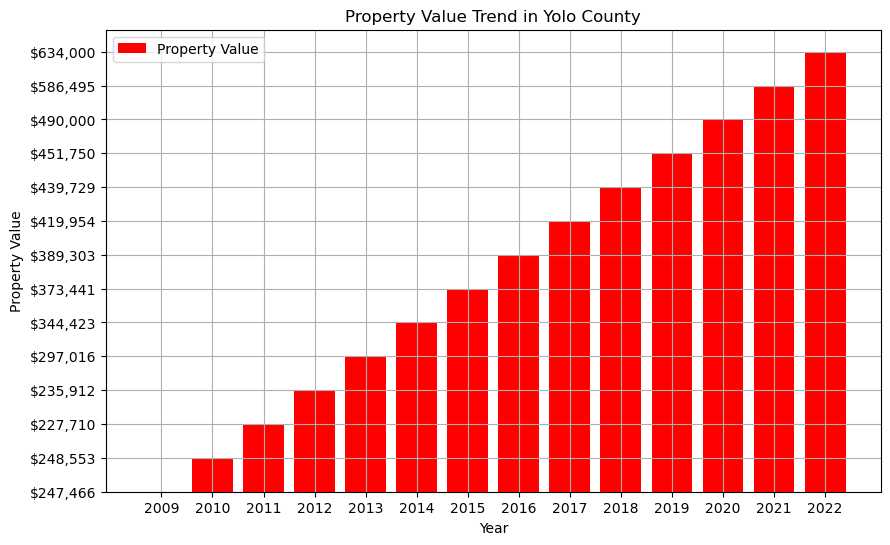

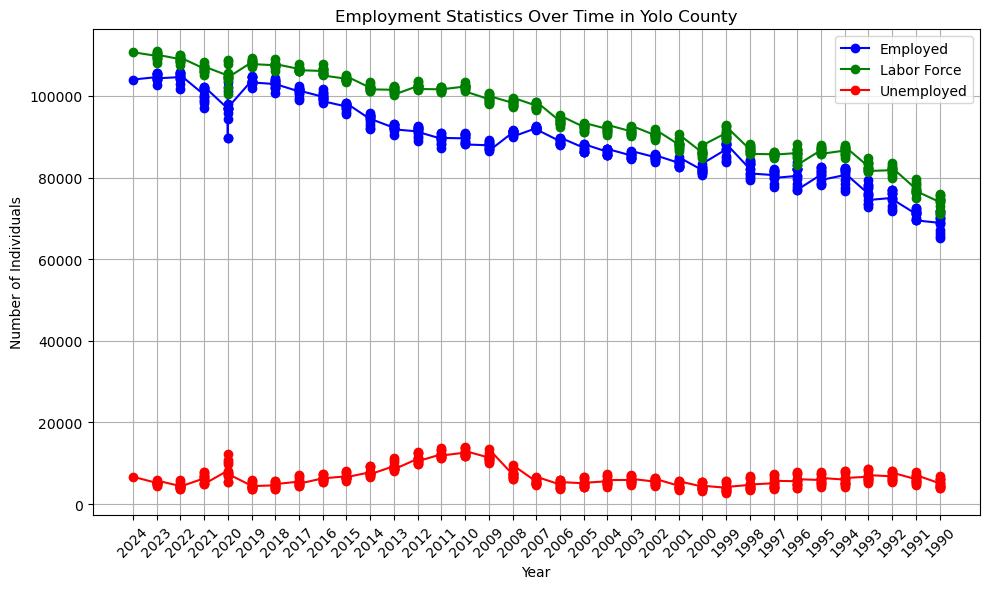

In [96]:
#Visualization part for question 1
import matplotlib.pyplot as plt

filtered_data = economic_statistics_chart[(economic_statistics_chart['Year'].astype(int) >= 2009) & (economic_statistics_chart['Year'].astype(int) <= 2024)]

# Plotting Unemployment Rate Trend
plt.figure(figsize=(10, 6))
plt.plot(filtered_data["Year"], filtered_data["Unemployment Rate %"], marker='o', color='blue', label='Unemployment Rate')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.title('Unemployment Rate Trend in Yolo County (2009-2024)', fontsize=14)
plt.xticks(rotation=45, fontsize=10) 
plt.yticks(fontsize=10)  
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(prune='both'))


plt.tight_layout()  
plt.show()

import matplotlib.pyplot as plt

# Sort the DataFrame by years
sorted_median_house_price_chart = median_house_price_chart.sort_values(by="Year")

# Plotting Property Value Trend as a Bar Graph
plt.figure(figsize=(10, 6))
plt.bar(sorted_median_house_price_chart["Year"], sorted_median_house_price_chart["Property Value"], color='red', label='Property Value')
plt.xlabel('Year')
plt.ylabel('Property Value')
plt.title('Property Value Trend in Yolo County')
plt.legend()
plt.grid(True)

plt.show()



# Plotting Employment Statistics Over Time

economic_statistics_chart['No. of Employed'] = economic_statistics_chart['No. of Employed'].str.replace(',', '').astype(int)
economic_statistics_chart['Labor Force'] = economic_statistics_chart['Labor Force'].str.replace(',', '').astype(int)
economic_statistics_chart['No. of Unemployed'] = economic_statistics_chart['No. of Unemployed'].str.replace(',', '').astype(int)

plt.figure(figsize=(10, 6))

# Plotting Number of Employed Individuals
plt.plot(economic_statistics_chart["Year"], economic_statistics_chart["No. of Employed"], marker='o', color='blue', label='Employed')

# Plotting Labor Force Size
plt.plot(economic_statistics_chart["Year"], economic_statistics_chart["Labor Force"], marker='o', color='green', label='Labor Force')

# Plotting Number of Unemployed Individuals
plt.plot(economic_statistics_chart["Year"], economic_statistics_chart["No. of Unemployed"], marker='o', color='red', label='Unemployed')

plt.xlabel('Year')
plt.ylabel('Number of Individuals')
plt.title('Employment Statistics Over Time in Yolo County')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Analysis of Question 1

The data given from the labor market info website from the employment development department for the state of California is very informational. In chart 1, we can see unemployment rate started off extremely high at 12.8 at its peak in 2009. This is accurate with a recession and housing crisis in 2009. We see a steady decline in the unemployment rate but median house prices are also going down along with the unemployment rate going down from 2009 to 2011. As the market starts to stabalize, the median houseprice triples while the unemployment rate drops to a steady 6% to 5% where it has stayed since around 2014. This is surprising as we see a constant unemployment rate but a drastic increase in house prices. It shows that even with a high unemployment rate such as 2012, the median house prices still went up. This is important information as it shows that sellers can still upsell their house even in times after a recent recession. 

The third chart also gives more information about labor statistics in Yolo County. Using the same employment development department website, we see that the number of unemployed people spikes in 2020 and 2009-2011. This is consistent with recessions such as Covid and the 2009 housing crisis. We also see that the labor force increases from 70,000 to around 100,000 for Yolo County. This is about a 40% increase in population of employed workers but we still a drastic spike in household median prices. This chart again shows us that more people are moving to Yolo County but it is not justifiable enough at the rate the household prices go up by. 

In terms of our hypothesis, it is true because we see that the unemployment rate is constant during years where there are no recessions but spike during years of Covid 19 and the housing crisis. We also see an increase in the labor force and see that the population of employed workers have increased in Yolo county. This has led to more people wanting to settle down roots in Yolo county as their job is here. Our charts also show that sellers are aware of that and with a lack of new developments, sellers are upcharging their houses as the median price household has tripled in recent years. Overall, our hypothesis was proven true and the data is very compelling.



# Question 2) Are there any demographic shifts occurring in the Yolo County area that might affect property values in the near future?

Hypothesis: Our hypothesis is that the demographic will skew towards more people of Latino descent instead of white people. We will also see a rise in population over the years in Yolo County. In terms of poverty rate per races, there could be multiple groups with high poverty rates in Yolo County which could impact their ability to afford a house. We will also see more married couples with houses which could be useful for real estate agents who are looking to target a specific demographic.

Links used for the question:
https://worldpopulationreview.com/us-counties/ca/yolo-county-population

In [64]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL 
url = "https://worldpopulationreview.com/us-counties/ca/yolo-county-population"
response = requests.get(url)

# Parsing
soup = BeautifulSoup(response.content, "html.parser")

# All tables on the page
tables = soup.find_all("table")

dfs = []

# Iterate through each table
for table in tables:
    all_entries = []

    # Find all rows in the table
    rows = table.find_all("tr")
    
    # Iterate through each row
    for row in rows:
        cells = row.find_all(["th", "td"])
        entry = [cell.text.strip() for cell in cells]
        all_entries.append(entry)

    # Create a pandas Data frame
    df = pd.DataFrame(all_entries)
    dfs.append(df)

# Display each dataframe
for i, df in enumerate(dfs, start=1):
    print(f"DataFrame {i}:")
    print(df)
    print()  


DataFrame 1:
       0           1         2            3
0   Year  Population    Growth  Growth Rate
1   2029     285,647     9,076        3.28%
2   2028     276,571     9,076        3.39%
3   2027     267,495     9,076        3.51%
4   2026     258,419     9,076        3.64%
5   2025     249,343     9,076        3.78%
6   2024     240,267     9,076        3.93%
7   2023     231,191     9,076        4.09%
8   2022     222,115     9,076        4.26%
9   2021     213,039    -3,252        -1.5%
10  2020     216,291    -3,728       -1.69%
11  2019     220,019       -63       -0.03%
12  2018     220,082     1,612        0.74%
13  2017     218,470     2,901        1.35%
14  2016     215,569     3,571        1.68%
15  2015     211,998     3,630        1.74%
16  2014     208,368     2,101        1.02%
17  2013     206,267     1,709        0.84%
18  2012     204,558     2,627         1.3%
19  2011     201,931       870        0.43%
20  2010     201,061                       
21  1990     141,09

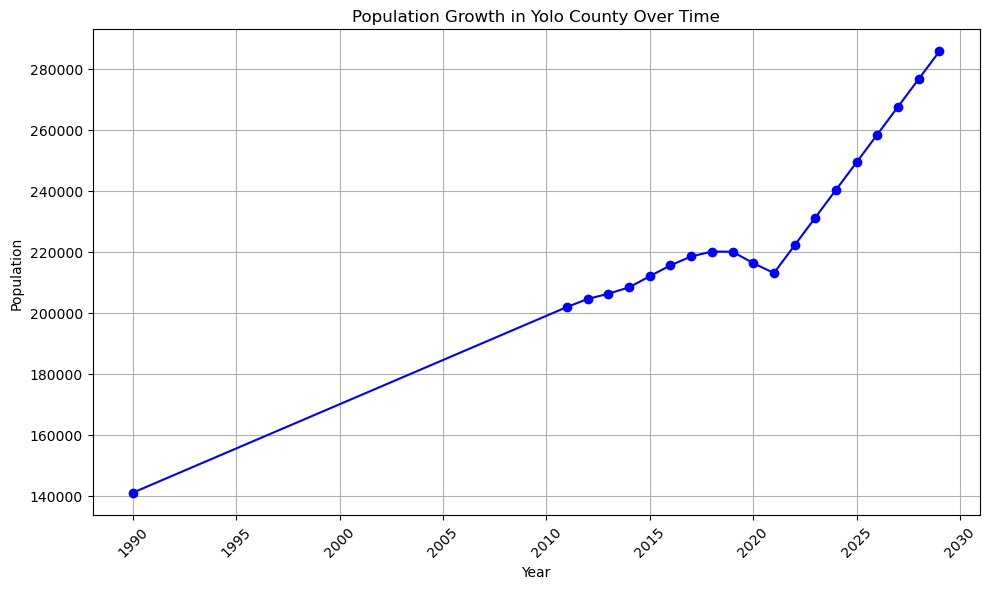

/var/folders/_y/0ybsc67152q_qq_rp_01n8cc0000gn/T/ipykernel_49282/3067299517.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_race["Population"] = df_race["Population"].str.replace(",", "").astype(int)


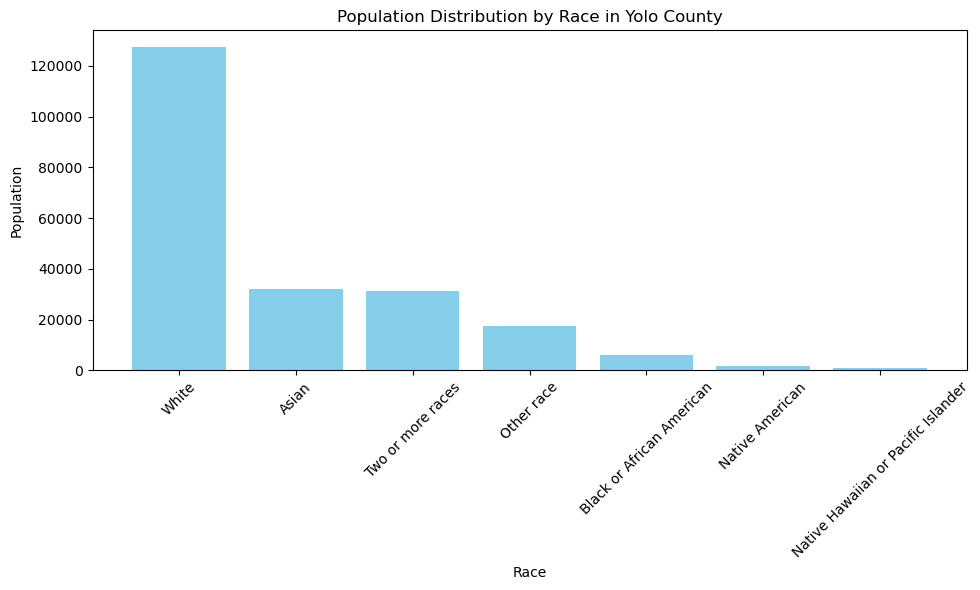

/var/folders/_y/0ybsc67152q_qq_rp_01n8cc0000gn/T/ipykernel_49282/3067299517.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_poverty["Total"] = df_poverty["Total"].str.replace(",", "").astype(int)
/var/folders/_y/0ybsc67152q_qq_rp_01n8cc0000gn/T/ipykernel_49282/3067299517.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_poverty["In Poverty"] = df_poverty["In Poverty"].str.replace(",", "").astype(int)
/var/folders/_y/0ybsc67152q_qq_rp_01n8cc0000gn/T/ipykernel_49282/3067299517.py:69: SettingWith

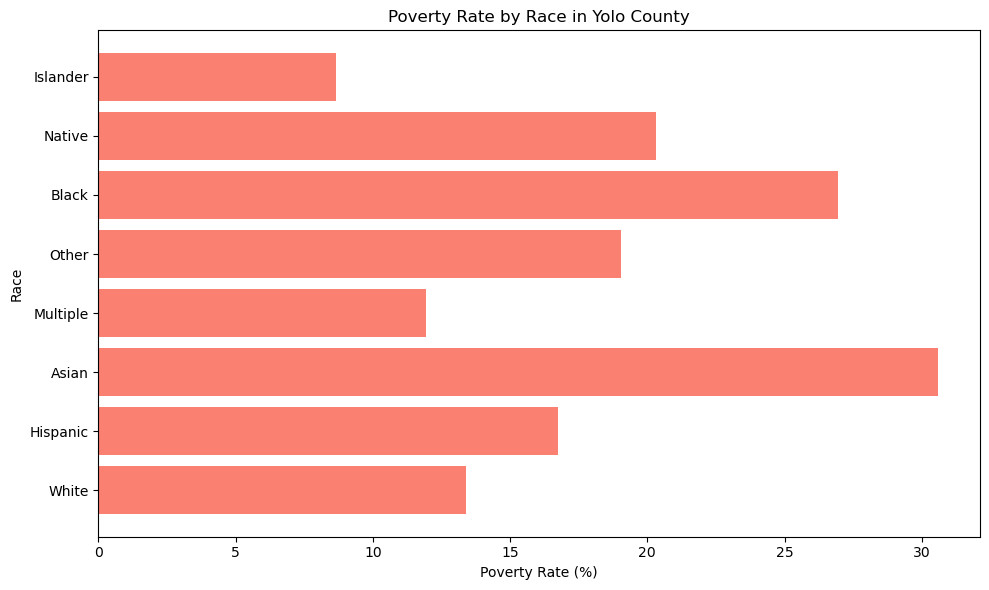

/var/folders/_y/0ybsc67152q_qq_rp_01n8cc0000gn/T/ipykernel_49282/3067299517.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_household["Count"] = df_household["Count"].str.replace(",", "").astype(int)
/var/folders/_y/0ybsc67152q_qq_rp_01n8cc0000gn/T/ipykernel_49282/3067299517.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_household["Average Size"] = df_household["Average Size"].astype(float)
/var/folders/_y/0ybsc67152q_qq_rp_01n8cc0000gn/T/ipykernel_49282/3067299517.py:91: SettingWithCopyWar

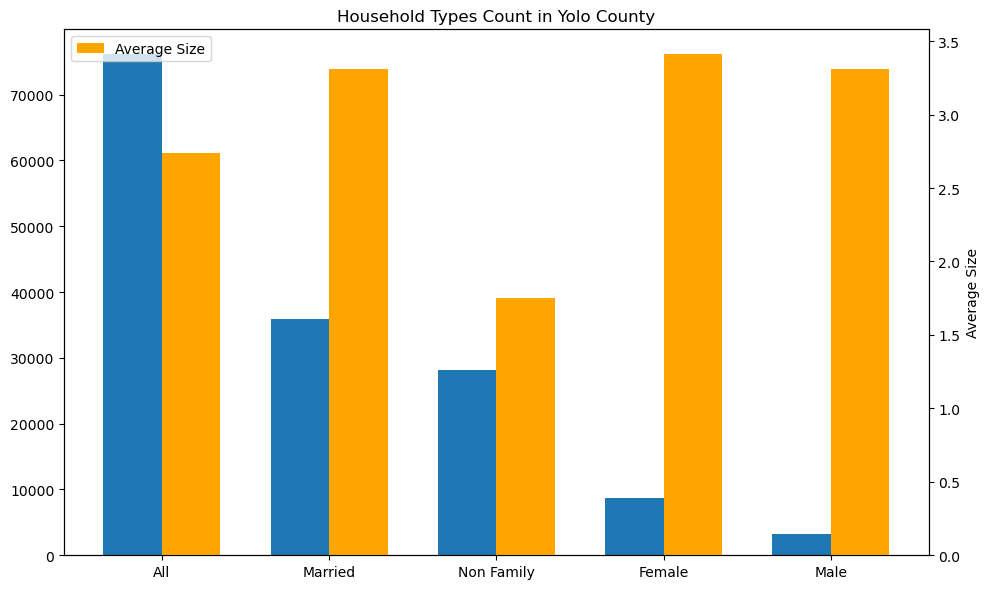

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Chart 1: Population Growth Over Time
df_population = dfs[0] 

df_population = df_population.drop(0).reset_index(drop=True)

# Convert population and growth columns to numeric values
df_population["Population"] = pd.to_numeric(df_population["Population"].str.replace(",", ""), errors="coerce")
df_population["Growth"] = pd.to_numeric(df_population["Growth"].str.replace(",", ""), errors="coerce")
df_population = df_population.dropna()

# Remove unnecessary rows 
df_population = df_population[df_population["Year"].astype(int) >= 1990]
df_population["Year"] = pd.to_datetime(df_population["Year"])

# Plot population growth over time
plt.figure(figsize=(10, 6))
plt.plot(df_population["Year"], df_population["Population"], marker='o', color='b')
plt.title("Population Growth in Yolo County Over Time")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Chart 2: Races in Yolo County
df_race = dfs[1].iloc[1:]
df_race.columns = ["Race", "Population", "Percentage"]

# Convert Population column to numeric values
df_race["Population"] = df_race["Population"].str.replace(",", "").astype(int)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(df_race["Race"], df_race["Population"], color='skyblue')
plt.title("Population Distribution by Race in Yolo County")
plt.xlabel("Race")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Chart 3: Poverty by Race in Yolo County
df_poverty = dfs[4].iloc[1:] 
df_poverty.columns = ["Race", "Total", "In Poverty", "Poverty Rate"]

# Convert numeric columns to numeric values
df_poverty["Total"] = df_poverty["Total"].str.replace(",", "").astype(int)
df_poverty["In Poverty"] = df_poverty["In Poverty"].str.replace(",", "").astype(int)
df_poverty["Poverty Rate"] = df_poverty["Poverty Rate"].str.rstrip("%").astype(float)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(df_poverty["Race"], df_poverty["Poverty Rate"], color='salmon')
plt.title("Poverty Rate by Race in Yolo County")
plt.xlabel("Poverty Rate (%)")
plt.ylabel("Race")
plt.tight_layout()
plt.show()

# Chart 4: Types of household in Yolo County
df_household = dfs[3].iloc[1:]  
df_household.columns = ["Household Type", "Count", "Average Size", "Owner", "Renter"]

# Convert numeric columns to numeric values
df_household["Count"] = df_household["Count"].str.replace(",", "").astype(int)
df_household["Average Size"] = df_household["Average Size"].astype(float)
df_household["Owner"] = df_household["Owner"].astype(float)
df_household["Renter"] = df_household["Renter"].astype(float)

# Plotting the data
plt.figure(figsize=(10, 6))

# Grouped bar chart for household count
bar_width = 0.35
index = df_household.index
labels = df_household["Household Type"]
count_bars = plt.bar(index, df_household["Count"], bar_width, label="Count")

# Secondary y-axis for average size
ax2 = plt.gca().twinx()
size_bars = ax2.bar(index + bar_width, df_household["Average Size"], bar_width, color='orange', label="Average Size")

plt.title("Household Types Count in Yolo County")
plt.xlabel("Household Type")
plt.ylabel("Count")
ax2.set_ylabel("Average Size")
plt.xticks(index + bar_width / 2, labels)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()



# Analysis for Question 2:

After webscrapping the data of Yolo County demographics, we get a lot of interesting statistics. In our first chart, our hypothesis that the population would be increasing in Yolo County holds true. We see an increase from 140,000 to 240,000 which makes sense with projected total of 280,000 by 2029. In our second chart, we look at population distribution by race. Surpisingly, my hypothesis for there being more latinos in Yolo County was incorrect and white people are the majority of the current population currently. This shows that most of these neighborhoods in Yolo County will have a majority white makeup which could be influential to a potential home buyer who is looking to be around people of a similar race and culture as them. 

In our third chart, we analyzed the poverty rates of multiple racial groups in Yolo County. Suprisingly, asian americans have the highest poverty rate currently at a little more than 30% and white people have one of the lowest poverty rates in Yolo County. This is useful statistics and it may indicate that white people could afford a house in Yolo County better than people of other races since there is less of them in poverty. This could be useful for targeting certain demographics who are able to afford a household in Yolo County. Our final chart shows the types of relationships who own a house in Yolo County. There is about 70,000 owned houses in Yolo County and the chart also shows the average size of the household given married, non-family, female and male individuals. Married individuals are the most likley to own a house which is not surprising since that was our hypothesis. What was surprising is that women are almost twice as likely to own a house than a male which means that there could be some worthwhile targeting to that demographic in terms of the real estate market. Overall, the demographics of who own a house, population statistics and poverty rates are all useful information for someone who is selling a house or a real estate agent who is looking to sell a house. 


